# Quality control routines for PNBOIA

In [14]:
import pandas as pd
%load_ext autoreload
%autoreload 2
import pnboia_qc.pnboia_limits as pnboia_limits
from pnboia_qc.qc_checks import QCChecks

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load PNBOIA data

In [15]:
df = pd.read_excel('../raw_data/po.xlsx')

In [16]:
df.head()

,#ano,mes,dia,hora,lon,lat,battery,wspd1,gust1,wdir1,...,cdir1,cvel2,cdir2,cvel3,cdir3,wvht,wmax,dpd,mwd,spred
0,2012,7,6,4,-37.945000,-15.989500,12.2,7.6,9.2,132.0,...,175.25,99.91,177.81,97.79,183.18,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
1,2012,7,6,5,-37.945667,-15.988833,12.2,7.4,9.1,122.0,...,189.33,84.58,186.64,97.82,169.48,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
2,2012,7,6,6,-37.945833,-15.987833,12.2,6.2,7.9,127.0,...,325.59,43.52,324.20,43.96,344.74,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
3,2012,7,6,7,-37.945833,-15.988333,12.2,6.8,8.5,112.0,...,270.37,27.47,268.81,28.30,208.79,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
4,2012,7,6,8,-37.945500,-15.989000,12.2,7.6,9.8,116.0,...,212.59,81.56,202.39,78.75,238.80,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0


## Create DateTime column

In [17]:
df['date_time'] = df['#ano'].astype(str).str.zfill(4) + df['mes'].astype(str).str.zfill(2) + df['dia'].astype(str).str.zfill(2) + df['hora'].astype(str).str.zfill(2)

In [18]:
df['date_time'] = pd.to_datetime(df['date_time'], format='%Y%m%d%H')
df.set_index('date_time', inplace=True)

In [19]:
df.drop(columns=['#ano', 'mes', 'dia', 'hora'], inplace=True)

In [20]:
df.columns = ['lon', 'lat', 'battery', 'wspd1', 'gust1', 'wdir1', 'wspd2', 'gust2',
       'wdir2', 'atmp', 'rh', 'dewpt', 'pres', 'sst', 'compass', 'arad',
       'cspd1', 'cdir1', 'cspd2', 'cdir2', 'cspd3', 'cdir3', 'swvht', 'mxwvht',
       'tp', 'wvdir', 'spred']

In [21]:
df.head()

,lon,lat,battery,wspd1,gust1,wdir1,wspd2,gust2,wdir2,atmp,...,cdir1,cspd2,cdir2,cspd3,cdir3,swvht,mxwvht,tp,wvdir,spred
date_time,,,,,,,,,,,,,,,,,,,,,
2012-07-06 04:00:00,-37.945000,-15.989500,12.2,7.6,9.2,132.0,7.4,9.1,130.0,24.9,...,175.25,99.91,177.81,97.79,183.18,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
2012-07-06 05:00:00,-37.945667,-15.988833,12.2,7.4,9.1,122.0,7.2,8.9,120.0,24.5,...,189.33,84.58,186.64,97.82,169.48,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
2012-07-06 06:00:00,-37.945833,-15.987833,12.2,6.2,7.9,127.0,6.1,7.7,125.0,24.3,...,325.59,43.52,324.20,43.96,344.74,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
2012-07-06 07:00:00,-37.945833,-15.988333,12.2,6.8,8.5,112.0,6.6,8.4,111.0,24.9,...,270.37,27.47,268.81,28.30,208.79,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
2012-07-06 08:00:00,-37.945500,-15.989000,12.2,7.6,9.8,116.0,7.4,9.6,114.0,25.0,...,212.59,81.56,202.39,78.75,238.80,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0


In [22]:
variables = df.drop(columns=['lon', 'lat', 'battery']).columns.to_list()

## Open limits for the data

In [23]:
mis_values = pnboia_limits.mis_value_axys_limits
limits = pnboia_limits.range_axys_limits
fine_limits = pnboia_limits.fine_axys_limits
stuck_limit = pnboia_limits.stuck_axys_limits
sigma_values = pnboia_limits.sigma_axys_limits
height = pnboia_limits.height
continuity_limit = pnboia_limits.continuity_axys_limits
anem_limits = pnboia_limits.anemometer_ascat

In [38]:
df

,lon,lat,battery,wspd1,gust1,wdir1,wspd2,gust2,wdir2,atmp,...,cspd3,cdir3,swvht,mxwvht,tp,wvdir,spred,wspd,wdir,gust
date_time,,,,,,,,,,,,,,,,,,,,,
2012-07-06 04:00:00,-37.945000,-15.989500,12.20,7.6,9.2,132.0,7.4,9.1,130.0,24.9,...,97.79,183.18,-9999.00,-9999.00,-9999.0,-9999.0,-9999.0,7.6,132.0,9.2
2012-07-06 05:00:00,-37.945667,-15.988833,12.20,7.4,9.1,122.0,7.2,8.9,120.0,24.5,...,97.82,169.48,-9999.00,-9999.00,-9999.0,-9999.0,-9999.0,7.4,122.0,9.1
2012-07-06 06:00:00,-37.945833,-15.987833,12.20,6.2,7.9,127.0,6.1,7.7,125.0,24.3,...,43.96,344.74,-9999.00,-9999.00,-9999.0,-9999.0,-9999.0,6.2,127.0,7.9
2012-07-06 07:00:00,-37.945833,-15.988333,12.20,6.8,8.5,112.0,6.6,8.4,111.0,24.9,...,28.30,208.79,-9999.00,-9999.00,-9999.0,-9999.0,-9999.0,6.8,112.0,8.5
2012-07-06 08:00:00,-37.945500,-15.989000,12.20,7.6,9.8,116.0,7.4,9.6,114.0,25.0,...,78.75,238.80,-9999.00,-9999.00,-9999.0,-9999.0,-9999.0,7.6,116.0,9.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-19 05:00:00,-37.938843,-16.002278,12.73,0.0,0.3,263.0,6.9,8.3,103.0,22.4,...,239.14,170.20,1.71,2.58,8.3,135.8,41.1,6.9,103.0,8.3
2016-12-19 06:00:00,-37.938917,-16.002095,12.70,0.0,0.6,276.0,5.7,7.2,106.0,22.7,...,130.70,154.83,1.64,2.62,8.7,142.9,40.5,5.7,106.0,7.2
2016-12-19 07:00:00,-37.938883,-16.002020,12.67,0.1,0.6,264.0,6.0,7.4,94.0,22.6,...,115.68,147.83,1.70,2.79,7.7,130.1,42.7,6.0,94.0,7.4


## Create the class to start the qc tests

In [25]:
qc = QCChecks(data=df,
              variables=variables,
              mis_values=mis_values,
              limits=limits,
              fine_limits=fine_limits,
              stuck_limit=stuck_limit,
              sigma_values=sigma_values,
              continuity_limit=continuity_limit,
              height=height
             )

## Misvalue test

In [26]:
for parameter in mis_values.keys():
    qc.mis_value(parameter=parameter)

rh: 774 flagged data
cspd1: 775 flagged data
cdir1: 2505 flagged data
cspd2: 774 flagged data
cdir2: 2504 flagged data
cspd3: 777 flagged data
cdir3: 2502 flagged data
dewpt: 775 flagged data
atmp: 774 flagged data
sst: 2514 flagged data
swvht: 11120 flagged data
mxwvht: 11120 flagged data
tp: 11116 flagged data
wvdir: 11119 flagged data
spred: 11116 flagged data


## Range test

In [27]:
for parameter in limits.keys():
    qc.range(parameter=parameter, test='gross')
    qc.range(parameter=parameter, test='fine')

swvht: 8 flagged data
swvht: 9 flagged data
mxwvht: 12 flagged data
mxwvht: 6 flagged data
tp: 9 flagged data
tp: 14 flagged data
wvdir: 4 flagged data
No range_limit for wvdir
wspd1: 924 flagged data
wspd1: 0 flagged data
wdir1: 148 flagged data
No range_limit for wdir1
gust1: 339 flagged data
gust1: 0 flagged data
wspd2: 1969 flagged data
wspd2: 0 flagged data
wdir2: 2112 flagged data
No range_limit for wdir2
gust2: 1967 flagged data
gust2: 0 flagged data
atmp: 0 flagged data
atmp: 7 flagged data
pres: 806 flagged data
pres: 5 flagged data
dewpt: 6851 flagged data
dewpt: 0 flagged data
sst: 7 flagged data
sst: 0 flagged data
rh: 1316 flagged data
No range_limit for rh
cspd1: 0 flagged data
cspd1: 1750 flagged data
cdir1: 15 flagged data
No range_limit for cdir1
cspd2: 0 flagged data
cspd2: 1741 flagged data
cdir2: 14 flagged data
No range_limit for cdir2
cspd3: 0 flagged data
cspd3: 1747 flagged data
cdir3: 19 flagged data
No range_limit for cdir3


## Comparison between ascat and anemometers


In [28]:
qc.ascat_anemometer(limits=anem_limits['portoseguro'])

## Comparison between swvht and mxwvht

In [29]:
qc.swvht_mxwvht(swvht_name = 'swvht', mxwvht_name = 'mxwvht')

swvht: 6 flagged data
mxwvht: 11 flagged data


## Comparison of wind speed and gust

In [30]:
qc.wind_speed_gust(wspd_name='wspd1', gust_name='gust1')
qc.wind_speed_gust(wspd_name='wspd2', gust_name='gust2')

wspd1: 2 flagged data
gust1: 10 flagged data
wspd2: 4 flagged data
gust2: 5 flagged data


## Comparison of Dewpt and Atmp

In [31]:
qc.dewpt_atmp(dewpt_name='dewpt', atmp_name='atmp')

dewpt: 170 flagged data


## Comparison of battery and pressure

In [32]:
qc.battery(battery_name='battery', pres_name='pres')

pres: 1826 flagged data


## Stuck sensor test

In [33]:
for parameter in variables:
    if parameter != 'battery':
        qc.stuck_sensor(parameter=parameter)

wspd1: 76 flagged data
gust1: 76 flagged data
wdir1: 0 flagged data
wspd2: 5 flagged data
gust2: 3 flagged data
wdir2: 16 flagged data
atmp: 50 flagged data
rh: 282 flagged data
dewpt: 2 flagged data
pres: 12 flagged data
sst: 5 flagged data
compass: 41 flagged data
arad: 17 flagged data
cspd1: 0 flagged data
cdir1: 0 flagged data
cspd2: 1 flagged data
cdir2: 0 flagged data
cspd3: 0 flagged data
cdir3: 0 flagged data
swvht: 0 flagged data
mxwvht: 0 flagged data
tp: 15 flagged data
wvdir: 16 flagged data
spred: 66 flagged data


## Convert wind to 10 meters

In [263]:
qc.convert_wind(wspd_name='wspd1', gust_name='gust1')
qc.convert_wind(wspd_name='wspd2', gust_name='gust2')

## Select the best anemometer

In [264]:
qc.best_sensor(parameters1=['wspd1', 'wdir1', 'gust1'],parameters2=['wspd2','wdir2', 'gust2'])

## Time continuity test

In [265]:
for parameter in sigma_values.keys():
    try:
        qc.t_continuity(parameter=parameter)
    except:
        print('error')

swvht: 2 flagged data
rh: 102 flagged data
pres: 0 flagged data
atmp: 4 flagged data
wspd: 15 flagged data
wspd1: 15 flagged data
wspd2: 0 flagged data
sst: 4 flagged data


## Front exception tests

In [266]:
qc.front_except1(wdir_name='wdir', atmp_name='atmp')

atmp: 0 flagged data


In [267]:
qc.front_except3(wspd_name='wspd', atmp_name='atmp')

atmp: 0 flagged data


In [268]:
qc.front_except4(pres_name='pres', wspd_name='wspd')

wspd: 0 flagged data


/media/soutobias/extra/code/pnboia_qc/pnboia_qc/qc_checks.py:500: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [269]:
qc.front_except5(pres_name='pres')

pres: 0 flagged data


In [270]:
qc.front_except6(wspd_name='wspd', swvht_name='swvht')

swvht: 0 flagged data


## Plots to compare data

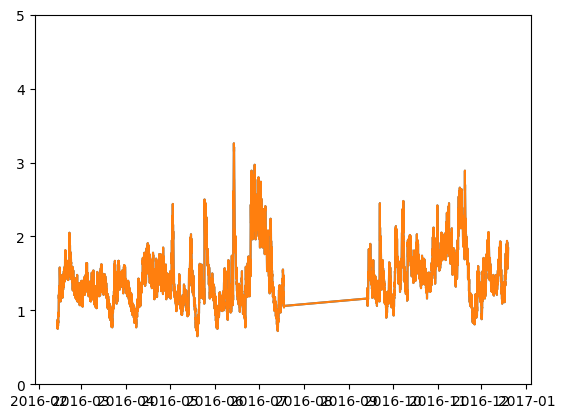

In [274]:
qc.plot_comparison(parameter='swvht',ylim=[0,5], start_date='2016-01-01', end_date='2017-02-01')

In [275]:
qc.plot_comparison(parameter='swvht',
                   ylim=[0,5],
                   start_date='2016-01-01',
                   end_date='2017-02-01',
                   plot_type='plotly')

In [34]:
stuck_limit

7

In [35]:
anem_test = anem_limits['portoseguro']
qc_config = {
    'miss_value': {
        'parameters': list(mis_values.keys()),
        'limits': list(mis_values.values())
    },
    'gross_range': {
        'parameters': list(limits.keys()),
        'limits': list(limits.values())
    },
    'fine_range':{
        'parameters': list(fine_limits.keys()),
        'limits': list(fine_limits.values())
    },
    'ascat_anemometer':{
        'parameters': [['wspd1', 'wdir1', 'gust1'], ['wspd2','wdir2', 'gust2']],
        'limits': anem_test
    },
    'swvht_mxwvht': {
        'parameters': [['swvht', 'mxwvht']]
    },
    'wind_speed_gust': {
        'parameters': [['wspd1', 'gust1'], ['wspd2', 'gust2']]
    },
    'dewpt_atmp': {
        'parameters': [['dewpt', 'atmp']]
    },
    'battery': {
        'parameters': [['battery', 'pres']]
    },
    'stuck_sensor': {
        'parameters': variables, 'limits': stuck_limit},
    'convert_wind': {
        'parameters': [['wspd1', 'gust1'], ['wspd2', 'gust2']]
    },
    'best_sensor': {
        'parameters': [['wspd1', 'wdir1', 'gust1'], ['wspd2','wdir2', 'gust2']]
    },
    't_continuity': {
        'parameters': list(sigma_values.keys()),
        'sigma': list(sigma_values.values()),
        'limits': continuity_limit,
        'exceptions': [
            {'test': 1,
             'parameters': ['wdir', 'atmp']},
            {'test': 3,
             'parameters': ['wspd', 'atmp']},
            {'test': 4,
             'parameters': ['pres', 'wspd']},
            {'test': 5,
             'parameters': 'pres'},
            {'test': 6,
             'parameters': ['wspd', 'swvht']}
        ]
    }
}


In [39]:
qc_config

{'miss_value': {'parameters': ['rh',
   'cspd1',
   'cdir1',
   'cspd2',
   'cdir2',
   'cspd3',
   'cdir3',
   'dewpt',
   'atmp',
   'sst',
   'swvht',
   'mxwvht',
   'tp',
   'wvdir',
   'spred'],
  'limits': [[11, -9999, nan],
   [409.5, -9999, nan],
   [511, -9999, nan],
   [409.5, -9999, nan],
   [511, -9999, nan],
   [409.5, -9999, nan],
   [511, -9999, nan],
   [-10, -9999, nan],
   [-10, -9999, nan],
   [40.955, -9999, nan],
   [20.47, -9999, nan],
   [20.47, -9999, nan],
   [25.5, -9999, nan],
   [381, -9999, nan],
   [381, -9999, nan]]},
 'gross_range': {'parameters': ['swvht',
   'mxwvht',
   'tp',
   'wvdir',
   'wspd1',
   'wdir1',
   'gust1',
   'wspd2',
   'wdir2',
   'gust2',
   'atmp',
   'pres',
   'dewpt',
   'sst',
   'rh',
   'cspd1',
   'cdir1',
   'cspd2',
   'cdir2',
   'cspd3',
   'cdir3'],
  'limits': [[0.1, 19.9],
   [0.1, 19.9],
   [1.7, 30],
   [0, 360],
   [0.1, 59],
   [0, 360],
   [0.1, 59],
   [0.1, 59],
   [0, 360],
   [0.1, 59],
   [-39, 59],
   [50

In [36]:
qc = QCChecks(data=df,
              variables=variables,
              qc_config=qc_config
             )

In [41]:
qc.data.swvht

date_time
2012-07-06 04:00:00   -9999.00
2012-07-06 05:00:00   -9999.00
2012-07-06 06:00:00   -9999.00
2012-07-06 07:00:00   -9999.00
2012-07-06 08:00:00   -9999.00
                        ...   
2016-12-19 05:00:00       1.71
2016-12-19 06:00:00       1.64
2016-12-19 07:00:00       1.70
2016-12-19 08:00:00       1.80
2016-12-19 09:00:00       1.84
Name: swvht, Length: 17733, dtype: float64

In [37]:
qc.run()

-------------
Check miss_value
parameter: rh
rh: 774 flagged data
parameter: cspd1
cspd1: 775 flagged data
parameter: cdir1
cdir1: 2505 flagged data
parameter: cspd2
cspd2: 774 flagged data
parameter: cdir2
cdir2: 2504 flagged data
parameter: cspd3
cspd3: 777 flagged data
parameter: cdir3
cdir3: 2502 flagged data
parameter: dewpt
dewpt: 775 flagged data
parameter: atmp
atmp: 774 flagged data
parameter: sst
sst: 2514 flagged data
parameter: swvht
swvht: 11120 flagged data
parameter: mxwvht
mxwvht: 11120 flagged data
parameter: tp
tp: 11116 flagged data
parameter: wvdir
wvdir: 11119 flagged data
parameter: spred
spred: 11116 flagged data
-------------
Check gross_range
parameter: swvht
swvht: 8 flagged data
parameter: mxwvht
mxwvht: 12 flagged data
parameter: tp
tp: 9 flagged data
parameter: wvdir
wvdir: 4 flagged data
parameter: wspd1
wspd1: 924 flagged data
parameter: wdir1
wdir1: 148 flagged data
parameter: gust1
gust1: 339 flagged data
parameter: wspd2
wspd2: 1969 flagged data
parame

KeyboardInterrupt: 